In [45]:
import pandas as pd
import mglearn
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")

data = pd.read_csv(adult_path, header=None,index_col=False,
                   names = ['age', 'workclass', 'fnlwgt', 'education',  'education-num',
                                   'marital-status', 'occupation', 'relationship', 'race', 'gender',
                                   'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                                   'income'])
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


**incomeが50K以上か以下かを判別する**

# 特徴量エンジニアリング

## One-hot-Encording

In [8]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [12]:
print('Original features:\n',list(data.columns), "\n")
#ダミー変数化
data_dummies = pd.get_dummies(data)
print('Features after get_dummies:\n',list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [13]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [27]:
#Targetの手前までデータを取り出す
#pandasのスライスは指定のindexを含むので注意
features = data_dummies.loc[:,'age':'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values
print('X shape: {} y.shape: {}'.format(X.shape,y.shape))

X shape: (32561, 44) y.shape: (32561,)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print('Test socre: {:,.2f}'.format(logreg.score(X_test,y_test)))

Test socre: 0.81


## 数値でエンコーディングされているカテゴリ
カテゴリ変数が数値で表現されている場合がある。たとえば、チェック項目で0,1,2...など。これを連続値として扱ってはいけない。とるべきエンコーディングは個々のタスクを利用する機械学習のアルゴリズムに依存する。  
pandasのget_dummies（）は数値を連続値として扱うため、ダミー変数を作らない。これを防ぐには  
- scikit-learnのOneHotEncoderを使用する
- DataFrameの数値を文字列に変換する  
の2通りがある

In [31]:
demo_df = pd.DataFrame({
    'Integer Feature':[0,1,2,3],
    'Categorical Feature':['socks','fox','socks','box']
})
demo_df

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,3,box


In [32]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,3,1,0,0


In [33]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df)

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Integer Feature_3,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,0,1
1,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1
3,0,0,0,1,1,0,0


## ビニング、離散化、線形モデル、決定木
**最良のデータ表現の方法はデータの意味だけではなく、利用する機械学習のモデルにも依存する**  
線形モデルと決定木モデルで特徴量の表現の相違でどのように異なる結果を生むか検証する

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
print(f'X shape:{X.shape} y shape: {y.shape}')
#-3から3までのデータを作る(reshapeで(1000,)から(1000,1)に変換)
line = np.linspace(-3,3,1000, endpoint=False).reshape(-1,1)


X shape:(100, 1) y shape: (100,)


(1000, 1)

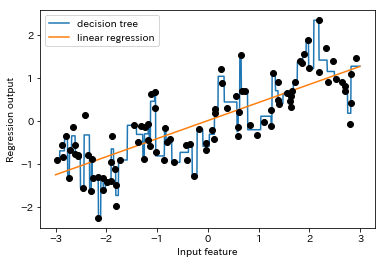

In [51]:
reg  = DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line, reg.predict(line), label='decision tree')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label='linear regression')

plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend()

線形モデルは、線形つまり直線しか表現できないのに対して、決定木ははるかに複雑なモデルを構築することができる。  
ただし、これはデータの表現に大きく依存する。線形モデルを連続データに対して、より強力にする方法の一つとして **ビンニングもしくは離散化がある**

### ビニング

In [53]:
#binを10個用意する
bins = np.linspace(-3,3,11)
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [56]:
#binに入れる
which_bin = np.digitize(X,bins=bins)
print('\nData points:\n',X[:5])
print('\nBin membership for data points:\n', which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [59]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
#fitでwhich_binに含まれる整数値のバリエーションを確認
encoder.fit(which_bin)
#trainsformでエンコーディングを行う
X_binned = encoder.transform(which_bin)
#binsが10個だったので10個の特徴量ができる(最初が4つ目の特徴量で表現されていることが分かる)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [60]:
print('X_binned shape: {}'.format(X_binned.shape))

X_binned shape: (100, 10)


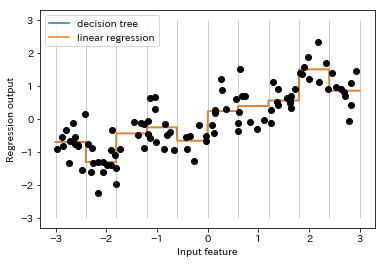

In [70]:
#ビニング
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg  = DecisionTreeRegressor(min_samples_split=3).fit(X_binned ,y)
plt.plot(line, reg.predict(line_binned), label='decision tree')

reg = LinearRegression().fit(X_binned , y)
plt.plot(line, reg.predict(line_binned), label='linear regression')

plt.plot(X[:,0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend()

線形回帰と決定木が完全に同じ予測を行う結果となった。  
ビンごとに特徴量が一定になるので、どのようなモデルを持ってきてもビンの中では同じ値を予測することなる。線形モデルではより柔軟な結果になったが、決定木に関しては柔軟性が低下している。  
**一般に特徴量をビニングすることは決定木にとってはメリットがない。**もともと決定木はデータを任意の場所で分割して学習できるからである。